## Pro Tour Classification
### CSI 777 Final Project
### Jennifer Smiley
### Due: 12/02/2021

In [1]:
import math
import matplotlib.pyplot as plt
import altair as alt
import pandas as pd
import numpy as np

In [2]:
# finding important variables
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
#Read in the dataset 
df = pd.read_csv("2020ProTour.csv")
df.head()

,DGPT_Standing,Player_ID,Player_Name,Ace_%,Eagle_%,Birdies _%,Pars_%,Bogeys_%,Dbl_Bogeys_%,3+Bogeys_%,Fairway_Hits,Parked,In_Circle1 (0-10m),In_Circle2 (0-20m),Scramble,C1_Putts,C2_Putts,Number_of_Tournaments
0,1,29190,Paige Pierce,0.0,1.20,40.87,41.02,12.43,3.74,0.75,70.83,14.84,44.38,64.92,44.65,88.12,20.53,12
1,2,44184,Catrina Allen,0.0,0.33,28.76,52.12,16.34,1.63,0.82,72.05,10.95,40.85,60.46,38.40,81.18,13.38,11
2,3,34563,Sarah Hokom,0.0,0.00,19.54,63.22,15.13,1.92,0.19,61.19,5.94,25.10,49.62,42.86,87.37,9.94,11
3,4,81351,Hailey King,0.0,0.20,31.82,47.83,16.40,2.96,0.79,63.14,6.13,34.78,53.95,49.99,87.73,17.65,9
4,5,85942,Missy Gannon,0.0,0.00,21.02,57.51,17.27,3.60,0.60,67.04,5.11,25.98,48.35,35.61,86.62,11.42,12


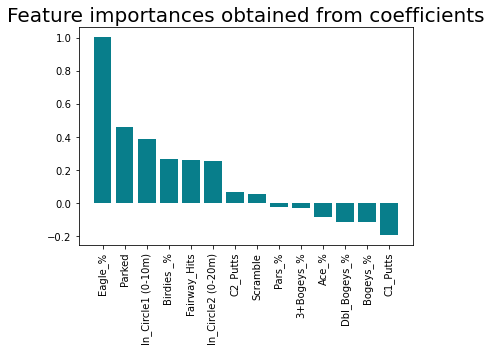

In [4]:
# Finding feature importance based on Logistic Regression
d1 = df.drop(['Player_Name', 'Number_of_Tournaments', 'Player_ID'], axis=1)
X = d1.drop('DGPT_Standing' , axis=1)
y = df['DGPT_Standing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [5]:
from sklearn.decomposition import PCA

In [6]:
# First PCA Score should show most of the variance in the coefficients 
pca = PCA().fit(X_train_scaled)
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Ace_%,0.037403,0.363496,0.514726,-0.047232,0.709466,0.267574,0.072359,0.142703,0.004595,-0.085987,-0.069444,0.005622,0.002245,0.000019
Eagle_%,-0.338348,0.435259,0.090009,-0.115938,-0.433080,0.680226,-0.017750,-0.188273,-0.040358,0.006392,-0.017737,-0.003865,-0.003666,0.000005
Birdies _%,-0.887642,0.307662,0.068508,-0.088315,-0.025232,-0.218123,-0.026500,-0.115797,0.101969,-0.156606,0.075417,0.098313,-0.076518,0.000721
Pars_%,-0.718747,-0.562769,-0.077059,0.159846,0.133484,0.214325,-0.114412,0.021759,-0.251740,0.061295,-0.059328,-0.002737,0.027267,0.000984
Bogeys_%,0.835160,0.128753,0.031441,0.215922,-0.173586,-0.030986,0.325257,0.008645,0.292624,-0.007702,-0.164499,-0.042980,0.016699,0.000805


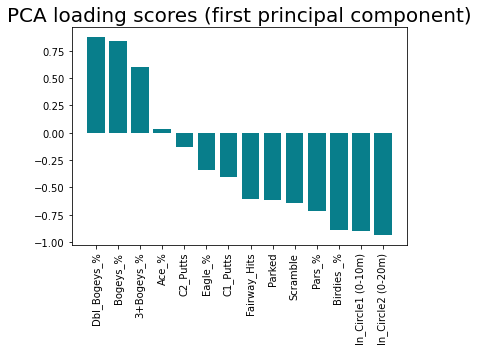

In [7]:
# Feature importance using PCA (1st Principal Component)
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
# Selecting only the columns that are needed
df4 = df[["DGPT_Standing", "Player_ID", "Player_Name","Number_of_Tournaments","Eagle_%", "Parked", "In_Circle1 (0-10m)", "Birdies _%", "Fairway_Hits", "In_Circle2 (0-20m)", "C2_Putts", "Scramble", "Dbl_Bogeys_%", "Bogeys_%", "3+Bogeys_%", "Ace_%"]]
df4.head()

,DGPT_Standing,Player_ID,Player_Name,Number_of_Tournaments,Eagle_%,Parked,In_Circle1 (0-10m),Birdies _%,Fairway_Hits,In_Circle2 (0-20m),C2_Putts,Scramble,Dbl_Bogeys_%,Bogeys_%,3+Bogeys_%,Ace_%
0,1,29190,Paige Pierce,12,1.20,14.84,44.38,40.87,70.83,64.92,20.53,44.65,3.74,12.43,0.75,0.0
1,2,44184,Catrina Allen,11,0.33,10.95,40.85,28.76,72.05,60.46,13.38,38.40,1.63,16.34,0.82,0.0
2,3,34563,Sarah Hokom,11,0.00,5.94,25.10,19.54,61.19,49.62,9.94,42.86,1.92,15.13,0.19,0.0
3,4,81351,Hailey King,9,0.20,6.13,34.78,31.82,63.14,53.95,17.65,49.99,2.96,16.40,0.79,0.0
4,5,85942,Missy Gannon,12,0.00,5.11,25.98,21.02,67.04,48.35,11.42,35.61,3.60,17.27,0.60,0.0


In [9]:
# Writing the above dataframe to a csv to use later
df4.to_csv("ProTour5.csv",index=False)

In [10]:
def readdata(filename):     # filename is a variable in the function, assigned later
    
    outputdata = []   # creates list of values
    
    with open(filename) as fd:
        header = fd.readline().strip('\n')    # read the file line by line, \n stripped as a result of bug in next section
        for rawdata in fd.readlines():    # .readlines creates list of all lines
            outraw = rawdata.strip('\n').split(',')    # splits at the comma
            outputdata.append((float(outraw[0]), int(outraw[1]), str(outraw[2]), int(outraw[3]), float(outraw[4]), 
                               float(outraw[5]), float(outraw[6]), float(outraw[7]), float(outraw[8]), float(outraw[9]), 
                                                                         float(outraw[10]), float(outraw[11]), 
                                                                               float(outraw[12]), float(outraw[13]),
                                                                               float(outraw[14]),float(outraw[15])))
            
    return outputdata

In [15]:
# KNN using the Logistic Regression Components 
def knn(dataset, Name, Tourn, Eagle, Parked, In_C1, Birdies, Fairway_Hits, In_C2, C2_Putts, Scramble, k=1):
    
    state = []
    sortsex = []
    
    for item in dataset:    # for each instance out of the tuple
        # distance formula w/ 9 dimensions
        dist = abs((Tourn - item[3]) + (Eagle-item[4]) + (Parked-item[5]) + (In_C1-item[6]) + (Birdies-item[7]) + 
                   (Fairway_Hits-item[8]) + (In_C2-item[9]) + (C2_Putts-item[10]) + (Scramble-item[11]))
        state.append((dist,item[0]))    # make a record of each "dist"
        
    sorted_by_first = sorted(state, reverse = False)   

    # only displays distance and the PDGA Ranking Number
    standing = sorted_by_first[0]

    print("Name of Player:", Name, ", Distance from nearest point:",standing[0], ", PDGA Ranking:", standing[1]) 

In [12]:
data = readdata("ProTour5.csv")

In [16]:
# Test on Paige Pierce
knn(data,"Paige Pierce",12,1.20,14.84,44.38,40.87,70.83,64.92,20.53,44.65)

Name of Player: Paige Pierce , Distance from nearest point: 0.0 , PDGA Ranking: 1.0


In [17]:
# Creating the test dataframe
# Testing dataframe
t = {'Player_Name': ['Kristin Tattar', 'Ella Hansen','Maria Oliva', 'Juliana Korver', 'Raven Klein', 'Nicole Bradley', 'Renae Farr', 'Keiti Tätte', 'Anniken Steen'], 
     'Number_of_Tournaments': [4, 7, 6, 12, 4, 3, 1, 1, 1],
    'Eagle': [1.52, 1.26, 0.28, 0, 0, 0.56, 0, 0, 0],
    'Parked': [13.64, 8.86, 9.36, 5.07, 4.63, 3.33, 0, 0, 2.78],
    'In_C1': [40.4, 29.62, 22.81, 28.43, 17.59, 25, 1.85, 13.89, 20.83],
    'Birdies': [34.85, 19.95, 21.94, 16.34, 14.81, 14.44, 3.7, 9.72, 9.72],
    'Fairway_Hits': [75.12, 70.76, 65.52, 72.7, 61.13, 71.63, 38.6, 76.25, 86.25],
    'In_C2': [64.14, 52.15, 48.25, 50.65, 35.65, 45, 9.26, 43.06, 38.89],
    'C2_Putts': [21.57, 7.58, 15, 5.32, 10.29, 3.7, 5.56, 4, 4.55],
    'Scramble': [45.45, 24.44, 25.27, 27.27, 22.97, 36.36, 17.65, 63.16, 33.33],
    'Dbl_Bogeys': [2.02, 6.06, 5.56, 4.58, 6.48, 2.22, 11.11, 1.39, 1.39],
    'Bogeys': [12.63, 17.17, 23.89, 20.59, 31.02, 15.56, 50, 12.5, 19.44],
    'Bogeys3': [0, 2.53, 1.94, 1.14, 3.7, 0.56, 9.26, 1.39, 0],
    'Ace': [0, 0, 0, 0, 0, 0, 0, 0, 0]}
test = pd.DataFrame(data=t)
test

,Player_Name,Number_of_Tournaments,Eagle,Parked,In_C1,Birdies,Fairway_Hits,In_C2,C2_Putts,Scramble,Dbl_Bogeys,Bogeys,Bogeys3,Ace
0,Kristin Tattar,4,1.52,13.64,40.40,34.85,75.12,64.14,21.57,45.45,2.02,12.63,0.00,0
1,Ella Hansen,7,1.26,8.86,29.62,19.95,70.76,52.15,7.58,24.44,6.06,17.17,2.53,0
2,Maria Oliva,6,0.28,9.36,22.81,21.94,65.52,48.25,15.00,25.27,5.56,23.89,1.94,0
3,Juliana Korver,12,0.00,5.07,28.43,16.34,72.70,50.65,5.32,27.27,4.58,20.59,1.14,0
4,Raven Klein,4,0.00,4.63,17.59,14.81,61.13,35.65,10.29,22.97,6.48,31.02,3.70,0
5,Nicole Bradley,3,0.56,3.33,25.00,14.44,71.63,45.00,3.70,36.36,2.22,15.56,0.56,0
6,Renae Farr,1,0.00,0.00,1.85,3.70,38.60,9.26,5.56,17.65,11.11,50.00,9.26,0
7,Keiti Tätte,1,0.00,0.00,13.89,9.72,76.25,43.06,4.00,63.16,1.39,12.50,1.39,0
8,Anniken Steen,1,0.00,2.78,20.83,9.72,86.25,38.89,4.55,33.33,1.39,19.44,0.00,0


In [19]:
#Test to see how it does for Kristin Tattar
knn(data, 'Kristin Tattar',4,1.52,13.64,40.40,34.85,75.12,64.14,21.57,45.45)

Name of Player: Kristin Tattar , Distance from nearest point: 13.52999999999999 , PDGA Ranking: 1.0


The Ranking does not make sense because a player who only competed in 4 tournaments would not have more points than someone who played in 12. The distance between Kristin and Paige is also too far to be considered an accurate fit. Meaning that these variables do not work well. 

In [20]:
# Using the top three coefficients from the Logistic Regression 
def knn2(dataset, Name, Tourn, Eagle, Parked, In_C1, k=1):
    
    state = []
    sortsex = []
    
    for item in dataset:    # for each instance out of the tuple
        # distance formula w/ 4 dimensions
        dist = abs((Tourn - item[3]) + (Eagle-item[4]) + (Parked-item[5]) + (In_C1-item[6]))
        state.append((dist,item[0]))    # make a record of each "dist"
        
    sorted_by_first = sorted(state, reverse = False)   

    # only displays distance and the PDGA Ranking Number
    standing = sorted_by_first[0]

    print("Name of Player:", Name, ", Distance from nearest point:",standing[0], ", PDGA Ranking:", standing[1])

In [21]:
#Test on Kristin Tattar
knn2(data, 'Kristin Tattar',4,1.52,13.64,40.40)
#Okay see if next player's ranking makes sense

Name of Player: Kristin Tattar , Distance from nearest point: 1.0199999999999978 , PDGA Ranking: 23.0


In [22]:
knn2(data, 'Ella Hansen',7,1.26,8.86,29.62)
#Does not make sense to be that low.

Name of Player: Ella Hansen , Distance from nearest point: 0.5500000000000007 , PDGA Ranking: 55.0


It does not make sense that someone who was in 7 tournaments would be that much lower ranked than someone who played in 4 tournaments. It would make sense to be slightly lower or higher but not to this extent. 

In [23]:
# Selecting only the PCA variables 
test2 = test[['Player_Name','Number_of_Tournaments','Dbl_Bogeys','Bogeys','Bogeys3']]
test2

,Player_Name,Number_of_Tournaments,Dbl_Bogeys,Bogeys,Bogeys3
0,Kristin Tattar,4,2.02,12.63,0.00
1,Ella Hansen,7,6.06,17.17,2.53
2,Maria Oliva,6,5.56,23.89,1.94
3,Juliana Korver,12,4.58,20.59,1.14
4,Raven Klein,4,6.48,31.02,3.70
5,Nicole Bradley,3,2.22,15.56,0.56
6,Renae Farr,1,11.11,50.00,9.26
7,Keiti Tätte,1,1.39,12.50,1.39
8,Anniken Steen,1,1.39,19.44,0.00


In [24]:
# Knn using the top 3 variables from the 1st PCA
def knn3(dataset, Name, Tourn, Dbl, Bogey, Bogey3, k=1):
    
    state = []
    sortsex = []
    
    for item in dataset:    # for each instance out of the tuple
        # distance formula w/ 4 dimensions
        dist = abs((Tourn - item[3]) + (Dbl-item[12]) + (Bogey-item[13]) + (Bogey3-item[14]))
        state.append((dist,item[0]))    # make a record of each "dist"
        
    sorted_by_first = sorted(state, reverse = False)   

    # only displays distance and the PDGA Ranking Number
    standing = sorted_by_first[0]

    print("Name of Player:", Name, ", Distance from nearest point:",standing[0], ", PDGA Ranking:", standing[1]) 

In [25]:
knn3(data, 'Kristin Tattar',4,2.02,12.63,0.00)
# Makes sense see next player

Name of Player: Kristin Tattar , Distance from nearest point: 0.019999999999999574 , PDGA Ranking: 20.0


In [26]:
knn3(data, 'Ella Hansen',7,6.06,17.17,2.53)

Name of Player: Ella Hansen , Distance from nearest point: 0.030000000000000693 , PDGA Ranking: 15.0


In [27]:
knn3(data, 'Maria Oliva',6,5.56,23.89,1.94)

Name of Player: Maria Oliva , Distance from nearest point: 0.11999999999999922 , PDGA Ranking: 18.0


In [28]:
knn3(data, 'Juliana Korver',12,4.58,20.59,1.14)

Name of Player: Juliana Korver , Distance from nearest point: 0.20999999999999952 , PDGA Ranking: 9.0


In [29]:
knn3(data, 'Raven Klein',4,6.48,31.02,3.70)

Name of Player: Raven Klein , Distance from nearest point: 0.23999999999999932 , PDGA Ranking: 76.0


In [30]:
knn3(data, 'Nicole Bradley',3,2.22,15.56,0.56)

Name of Player: Nicole Bradley , Distance from nearest point: 0.029999999999998472 , PDGA Ranking: 55.0


In [31]:
knn3(data, 'Renae Farr',1,11.11,50.00,9.26)

Name of Player: Renae Farr , Distance from nearest point: 0.009999999999999787 , PDGA Ranking: 99.0


In [32]:
knn3(data, 'Keiti Tätte',1,1.39,12.50,1.39)

Name of Player: Keiti Tätte , Distance from nearest point: 0.38000000000000067 , PDGA Ranking: 21.0


In [33]:
knn3(data, 'Anniken Steen',1,1.39,19.44,0.00)

Name of Player: Anniken Steen , Distance from nearest point: 0.009999999999999343 , PDGA Ranking: 56.0


The KNN3 model appears to work well. Meaning the PCA gave a better result for feature importance. There are some people I think could have been classified better such as Anniken Steen, but that was likely due to another point around 56 that had similar numbers to her for those three variables. Most of the peoples’ rankings made sense based on their inputted numbers. 